In [1]:
from deepfashion2_to_yolo import Deepfashion2DfBuilder
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import os

In [2]:
def split_dataset(df, train_size, validation_size, test_size):
    fractions = np.array([train_size, validation_size, test_size])
    
    df = df.sample(frac=1) # shuffle

    train, validation, test = np.array_split(
        df, (fractions[:-1].cumsum() * len(df)).astype(int))
    return train, validation, test

### dados deepfashion2 treino

In [3]:
IMAGE_DIR = "deepfashion2/train/image"
ANNOTATION_DIR = "deepfashion2/train/annos"

data_builder = Deepfashion2DfBuilder(IMAGE_DIR, ANNOTATION_DIR)
data = data_builder.create_dataframe()
data

,image_filename,category_name,xmin,ymin,xmax,ymax,source,pair_id
0,000001.jpg,trousers,249,423,466,623,user,1
1,000001.jpg,short_sleeve_top,0,29,466,622,user,1
2,000002.jpg,short_sleeve_top,165,133,466,572,shop,1
3,000002.jpg,short_sleeve_top,1,300,367,701,shop,1
4,000003.jpg,long_sleeve_dress,1,52,467,831,user,2
...,...,...,...,...,...,...,...,...
312181,191959.jpg,trousers,347,167,474,493,shop,15082
312182,191960.jpg,short_sleeve_top,121,0,341,102,shop,15082
312183,191960.jpg,trousers,146,69,297,478,shop,15082
312184,191961.jpg,short_sleeve_top,469,4,553,169,shop,15082


In [4]:
print(f"total de imagens: {len(data['image_filename'].unique())} total de objetos:{len(data)}")

total de imagens: 191961 total de objetos:312186


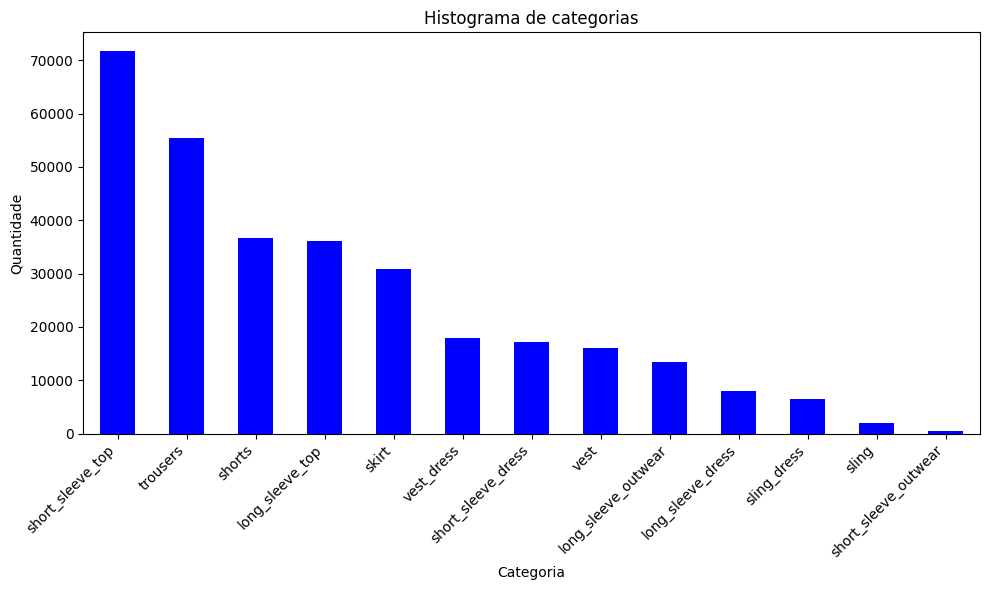

In [5]:
category_counts = data['category_name'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='blue')
plt.title('Histograma de categorias')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
value_counts = data['category_name'].value_counts()

for value, count in value_counts.items():
    print(f"categoria: {value}, quantidade: {count}")

categoria: short_sleeve_top, quantidade: 71645
categoria: trousers, quantidade: 55387
categoria: shorts, quantidade: 36616
categoria: long_sleeve_top, quantidade: 36064
categoria: skirt, quantidade: 30835
categoria: vest_dress, quantidade: 17949
categoria: short_sleeve_dress, quantidade: 17211
categoria: vest, quantidade: 16095
categoria: long_sleeve_outwear, quantidade: 13457
categoria: long_sleeve_dress, quantidade: 7907
categoria: sling_dress, quantidade: 6492
categoria: sling, quantidade: 1985
categoria: short_sleeve_outwear, quantidade: 543


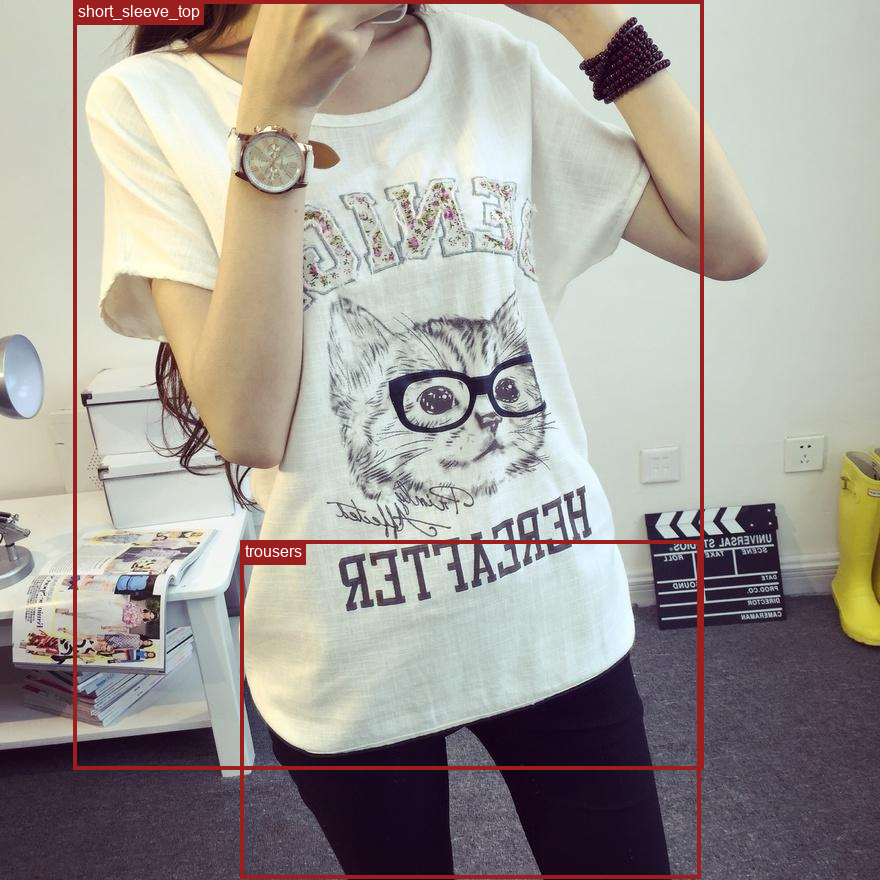

In [25]:
sampled_image = data.sample(n=1)

image_path = sampled_image['image_filename'].iloc[0]

source_img = Image.open(f"deepfashion2/train/image/{image_path}")

for _, row in data[data['image_filename'].isin(sampled_image['image_filename'])].iterrows():
    xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
    category = row['category_name']

    draw = ImageDraw.Draw(source_img)
    draw.rectangle(((xmin, ymin), (xmax, ymax)), outline=(156, 31, 31), width=4)

    font = ImageFont.truetype("arial.ttf", 16)
    text_width = draw.textlength(category, font=font)

    draw.rectangle(((xmin, ymin), (xmin + text_width + 8, ymin + 24)), fill=(156, 31, 31))
    draw.text((xmin + 5, ymin + 2), category, fill="white", font=font)

display(source_img)

### experimento 1: 250 objetos de cada categoria

In [8]:
train = pd.read_csv(os.path.join("experiments", "experiment_1", "train_data.csv"))
validation = pd.read_csv(os.path.join("experiments", "experiment_1", "validation_data.csv"))
test = pd.read_csv(os.path.join("experiments", "experiment_1", "test_data.csv"))

In [9]:
experiment_data = pd.concat([train, validation, test], ignore_index=True)
value_counts = experiment_data['category_name'].value_counts()

for value, count in value_counts.items():
    print(f"categoria: {value}, quantidade: {count}")

categoria: short_sleeve_top, quantidade: 756
categoria: trousers, quantidade: 733
categoria: shorts, quantidade: 657
categoria: skirt, quantidade: 536
categoria: long_sleeve_top, quantidade: 461
categoria: vest, quantidade: 359
categoria: long_sleeve_outwear, quantidade: 322
categoria: vest_dress, quantidade: 303
categoria: sling_dress, quantidade: 282
categoria: sling, quantidade: 268
categoria: long_sleeve_dress, quantidade: 262
categoria: short_sleeve_dress, quantidade: 259
categoria: short_sleeve_outwear, quantidade: 255


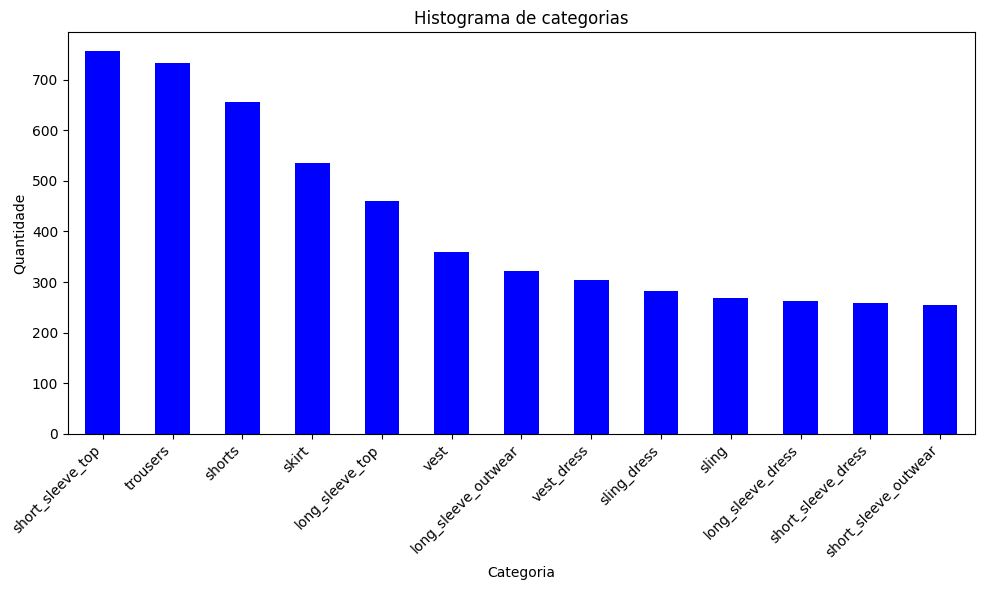

In [10]:
category_counts = experiment_data['category_name'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='blue')
plt.title('Histograma de categorias')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
print(f"total de imagens: {len(experiment_data['image_filename'].unique())} total de objetos:{len(experiment_data)}")

total de imagens: 3242 total de objetos:5453


### experimento 2: 500 objetos de cada categoria

In [12]:
train = pd.read_csv(os.path.join("experiments", "experiment_2", "train_data.csv"))
validation = pd.read_csv(os.path.join("experiments", "experiment_2", "validation_data.csv"))
test = pd.read_csv(os.path.join("experiments", "experiment_2", "test_data.csv"))

In [13]:
experiment_data = pd.concat([train, validation, test], ignore_index=True)
value_counts = experiment_data['category_name'].value_counts()

for value, count in value_counts.items():
    print(f"categoria: {value}, quantidade: {count}")

categoria: short_sleeve_top, quantidade: 1545
categoria: trousers, quantidade: 1496
categoria: shorts, quantidade: 1250
categoria: skirt, quantidade: 1154
categoria: long_sleeve_top, quantidade: 909
categoria: vest, quantidade: 696
categoria: long_sleeve_outwear, quantidade: 650
categoria: vest_dress, quantidade: 608
categoria: sling_dress, quantidade: 557
categoria: short_sleeve_dress, quantidade: 538
categoria: long_sleeve_dress, quantidade: 530
categoria: sling, quantidade: 521
categoria: short_sleeve_outwear, quantidade: 501


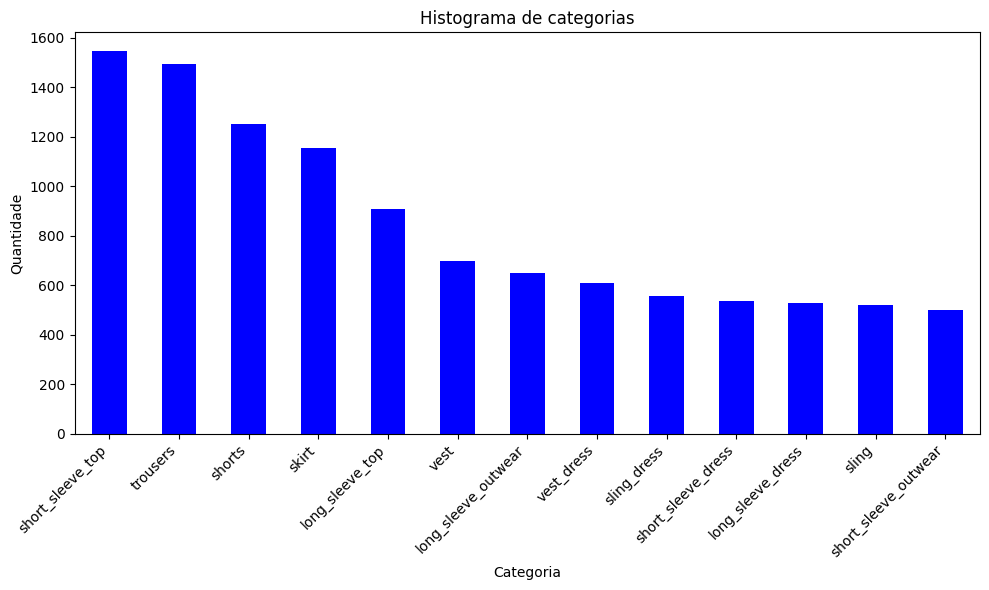

In [14]:
category_counts = experiment_data['category_name'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='blue')
plt.title('Histograma de categorias')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
print(f"total de imagens: {len(experiment_data['image_filename'].unique())} total de objetos:{len(experiment_data)}")

total de imagens: 6464 total de objetos:10955


### experimento 3: 1000 objetos de cada categoria

In [16]:
train = pd.read_csv(os.path.join("experiments", "experiment_3", "train_data.csv"))
validation = pd.read_csv(os.path.join("experiments", "experiment_3", "validation_data.csv"))
test = pd.read_csv(os.path.join("experiments", "experiment_3", "test_data.csv"))

In [17]:
experiment_data = pd.concat([train, validation, test], ignore_index=True)
value_counts = experiment_data['category_name'].value_counts()

for value, count in value_counts.items():
    print(f"categoria: {value}, quantidade: {count}")

categoria: short_sleeve_top, quantidade: 3029
categoria: trousers, quantidade: 2946
categoria: shorts, quantidade: 2343
categoria: skirt, quantidade: 2169
categoria: long_sleeve_top, quantidade: 1772
categoria: vest, quantidade: 1404
categoria: long_sleeve_outwear, quantidade: 1309
categoria: vest_dress, quantidade: 1158
categoria: sling_dress, quantidade: 1109
categoria: short_sleeve_dress, quantidade: 1073
categoria: long_sleeve_dress, quantidade: 1055
categoria: sling, quantidade: 1031
categoria: short_sleeve_outwear, quantidade: 543


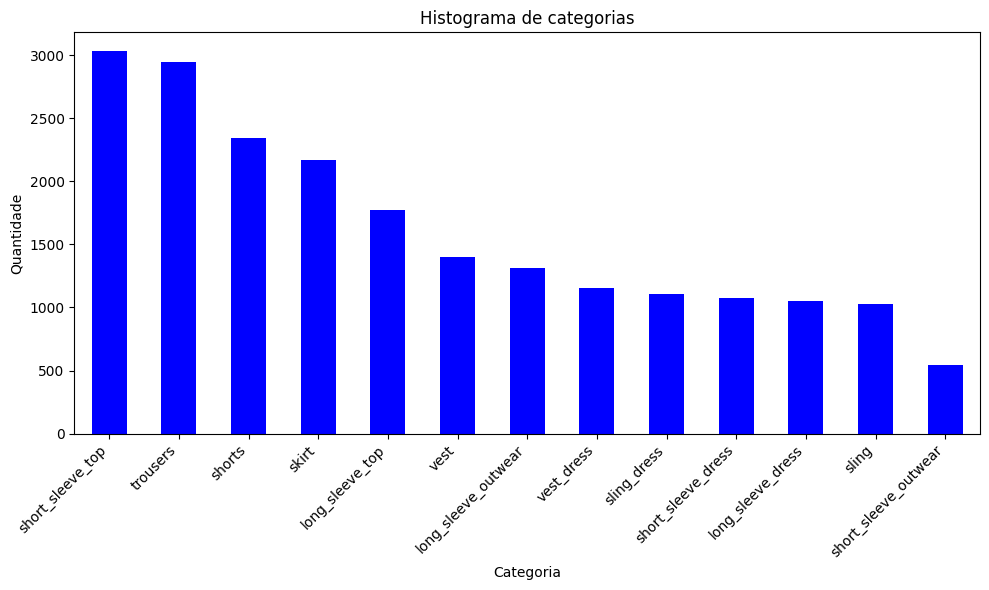

In [18]:
category_counts = experiment_data['category_name'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='blue')
plt.title('Histograma de categorias')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
print(f"total de imagens: {len(experiment_data['image_filename'].unique())} total de objetos:{len(experiment_data)}")

total de imagens: 12411 total de objetos:20941
